# **Examen 1**

***Alejandro Gómez Aguirre***

## **Caso a Desarrollar**

**Telco Customer Churn**

**Fuente:** https://www.kaggle.com/datasets/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv

In [57]:
# Importo librerias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive # Importamos la libreria para montar Google Drive

# Conecto a mi Google Drive
drive.mount('/content/drive')


# Utilizo
def cargar_datos(ruta_archivo):
    # Carga los datos del archivo CSV utilizando Pandas
    datos = pd.read_csv(ruta_archivo)
    return datos

# Define la ruta del archivo fuera de la función
ruta_archivo =  "/content/drive/MyDrive/Sonda-Skillnets/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Llama a la función para cargar los datos y asigna el resultado al DataFrame 'df'
df = cargar_datos(ruta_archivo)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1.- Limpieza de datos con Python:**
* Identificar y solucionar cualquier valor duplicado.
* Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
* Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).
* Identificar y solucionar cualquier valor faltante en el dataset. * Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.
* Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).

**Identificar y solucionar cualquier valor duplicado.**

In [58]:
# Busco la existencia de valores duplicados
# El resultado me indica que no existen duplicados
df.duplicated().sum()

np.int64(0)

**Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.**

In [66]:
# Obtengo la cantidad de filas y columnas del DataFrame.
# El resultado indica que son 7043 filas y 21 columnas
df.shape

(7043, 21)

In [67]:
# Listo las columnas de mi DataFrame
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [68]:
# Miro los primeros 5 registros
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [69]:
# Miro los últimos 5 registros
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [70]:
# Miro 5 registros aleatorios
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2499,6061-GWWAV,Male,0,No,Yes,41,Yes,No,DSL,Yes,...,Yes,No,Yes,No,One year,No,Mailed check,70.20,2894.55,No
5269,5424-RLQLC,Male,0,No,No,10,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,59.65,638.95,No
5093,2676-SSLTO,Male,0,No,No,49,Yes,Yes,DSL,No,...,No,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),66.15,3199.00,No
2079,5804-HYIEZ,Male,0,Yes,Yes,70,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.05,7554.05,No
2847,6985-HAYWX,Female,0,Yes,No,26,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),79.30,2015.80,No


In [71]:
# Obtengo la estadística de las variebles numéricas
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2285.446483
std,0.368612,24.559481,30.090047,2265.668302
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [59]:
# Validaremos la estrucura del Datframe y la cantidad de registros de cada columna
# Se aprecia que la cantidad de registros es de 7043 y que cada columna tiene la misma cantidad, lo que implica que no hay valores nulos
# No obstante, mirando la planilla excel, encuentro algunos valores ' ' en la columna TotalCharges. Estos serán limpiados.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Obs:** Puedo Apreciar que la columna TotalCharges es de tipo String (Object), por lo que debe ser modificada a float.

Encuentro, mirando la planilla excel valores 'blancos' en la columna TotalCharges, los cuales deberán ser imputados en una etapa de limpieza

In [61]:
# Busco los valores ' ' en columna TotalCharges, pues mirando la planilla excel, encuentro algunos valores ' '
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [62]:
# Cambio el tipo de datos de TotalCharges de String a float
# El cambio obedece a la imputación de velores a los valores ' '
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [72]:
# modifico nombre de columnas para dejar en minúsculas con el fin de normalizar y luego reviso
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


**Identificar y solucionar cualquier valor faltante en el dataset.**

**Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.**

In [74]:
# Al transformar la columna TotalCharges me debería transformar los valor ' ' por NaN.
# Valido la existencia de estos registros
# Se encuentran 11 registros con este calumna en NaN
df['totalcharges'].isnull().sum()

np.int64(0)

In [76]:
# Reemplazo valores nulos en la columna TotalCharges por el promedio de los valores, validando por campos 'gender' y 'Contract'
df['totalcharges'].fillna(df.groupby(['gender', 'contract'])['totalcharges'].transform('mean'), inplace=True)


<ipython-input-76-979759454>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['totalcharges'].fillna(df.groupby(['gender', 'contract'])['totalcharges'].transform('mean'), inplace=True)


In [77]:
# Vuelvo a buscar valores nulos en el campo TotalCharges, para comprabor la imputación realizada.
# Ya no existen valores nulos
df['totalcharges'].isnull().sum()

np.int64(0)

## **2.- Exploración de datos con Python:**
* Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
* Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.


**Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.**

In [78]:
# Existe una columna con el 'tipo de contrato', analizaré si afecta la rotación
df.groupby('contract')['churn'].value_counts()

contract        churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: count, dtype: int64

Mirando el cuadro anterior, el tipo de contrato Month-to-Month tiene una alta rotación

In [83]:
# Filtro los registros que han tenido retación, es decir, los que cuya columna 'churn' sea Yes
df_churn_yes = df[df['churn'] == 'Yes']

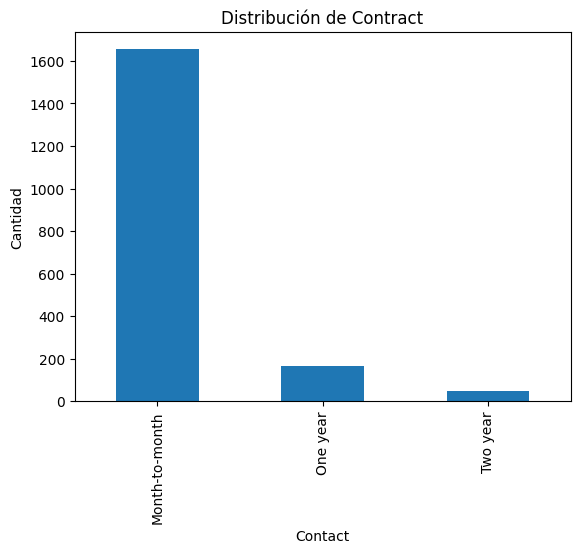

In [84]:
# Grafico de barra con columna Contract, de todos los registros cuya columna 'churn' sea Yes
df_churn_yes['contract'].value_counts().plot(kind='bar')
plt.title('Distribución de Contract')
plt.xlabel('Contact')
plt.ylabel('Cantidad')
plt.show()

Según el gráfico anterior, existe una gran rotación de las personas cuyo contrato es Month-to-Month

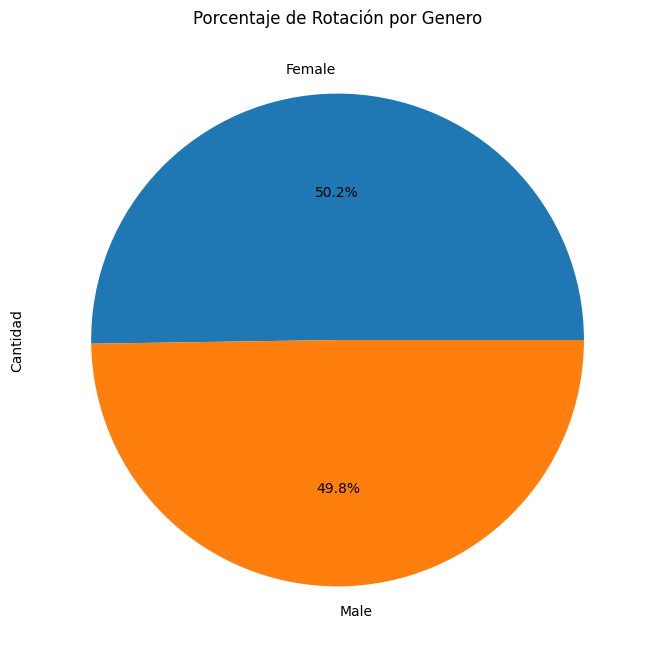

In [85]:
# Veré el porcentaje entre hombre y mujeres que han tenido rotación
# Creo un gráfico de todos los registros que en la columna Churn igual a Yes, el porcentaje por gender
df_churn_yes.groupby('gender').size().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Porcentaje de Rotación por Genero')
plt.ylabel('Cantidad')
plt.show()


Del gráfico anterior, podemos ver que no existe mayor diferencia en cuanto al sexo (gender) de las personas que han tenido rotación.

**Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.**

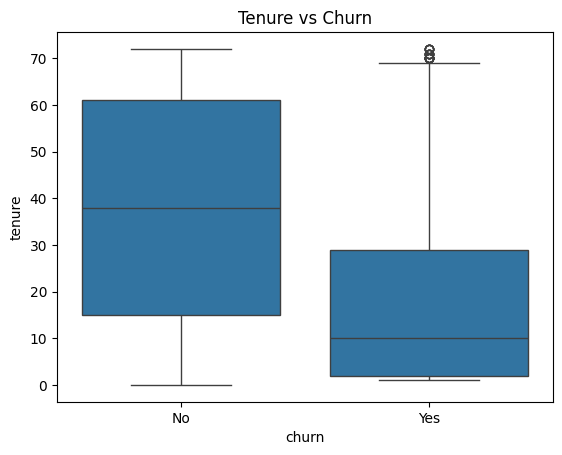

In [102]:
# Revisaré la distribución de los registros que han tenido rotación respecto del tiempo en meses (tenure) de permanencia
sns.boxplot(x='churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

Se aprecia en el gráfico que la rotación se da cuando los clientes llevan poco tiempo de permanencia.

También se aprecia, dentro de los clientes que han tenido rotación que existen valores atípicos.

<Axes: xlabel='tenure', ylabel='monthlycharges'>

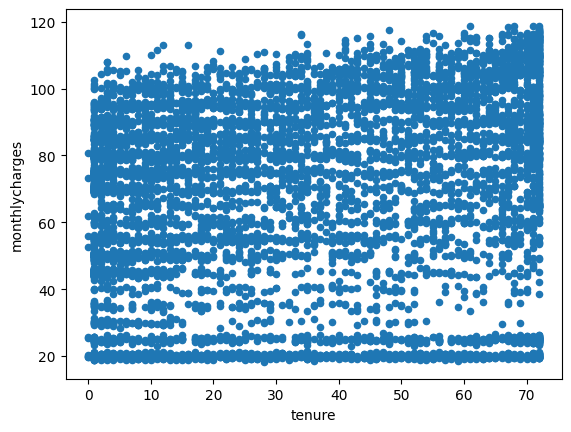

In [112]:
# Veré la relación entre la cantidad de tiempo de permanecia (tenure) y las carga que hacen en forma mensual (monthlycharges)

df.plot(kind="scatter", x="tenure", y ="monthlycharges")

En este gráfico de dispersión (o scatter plot) represento  visualmente la relación entre la cantidad de meses de permanencia (tenure),mientras los clientes están activos, y la carga mensual que realizan (monthlycharges)

Cada punto en el gráfico representa una observación con una coordenada en el eje X (tenure) y otra en el eje Y (monthlycharges)

Del gráfico anterior se desprende que sin importar la cantidad de meses de permanencia (tenure), los clientes, mantienen la carga mensual en forma constante y no presenta variaciones.

<Axes: xlabel='tenure', ylabel='totalcharges'>

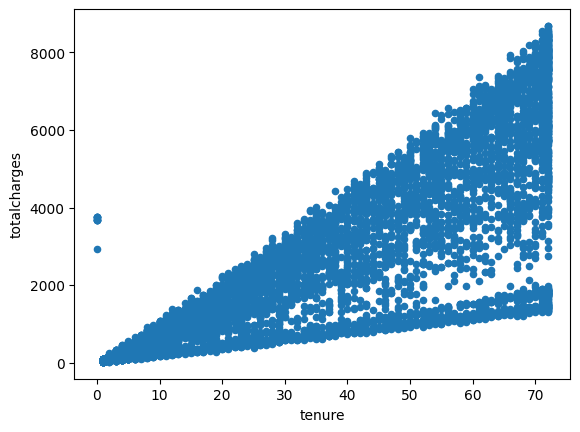

In [113]:
# Veré la relación entre la cantidad de tiempo de permanecia (tenure) y las carga total que han realizado (totalcharges)

df.plot(kind="scatter", x="tenure", y="totalcharges")

En este gráfico de dispersión (o scatter plot) represento visualmente la relación entre la cantidad de meses de permanencia (tenure), mientras los clientes están activos, y la carga total que han realizado (totalcharges)

Cada punto en el gráfico representa una observación con una coordenada en el eje X (tenure) y otra en el eje Y (totalcharges)

Del gráfico anterior se desprende a medida que el cliente tiene más meses de permanencia (tenure), la carga total aumenta en forma constante, presentando variaciones.